<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
import pandas as pd

# IBM Data Analyst Course - Large Survey Dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

# Read the dataset
df = pd.read_csv(url)

# Confirmation and first look
print("✅ Dataset loaded successfully!")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
df.head()


✅ Dataset loaded successfully!
Rows: 11552
Columns: 85


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
# 1️⃣ Sütun isimleri
print("Column Names:")
print(df.columns.tolist())

# 2️⃣ Veri tipleri ve eksik değerler
print("\nData Types and Missing Values:")
print(df.info())

# 3️⃣ Sayısal sütunlar için özet istatistikler
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Column Names:
['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisit

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [11]:
# Sayısal sütunlardaki eksik değerleri medyan ile doldur
num_cols = ['CodeRevHrs', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'Age']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Kategorik sütunları mod ile doldur
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Eksik değer kontrolü
print("✅ Missing values after imputation:\n", df.isnull().sum())


✅ Missing values after imputation:
 Respondent      0
MainBranch      0
Hobbyist        0
OpenSourcer     0
OpenSource      0
               ..
Sexuality       0
Ethnicity       0
Dependents      0
SurveyLength    0
SurveyEase      0
Length: 81, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [12]:
# Employment dağılımı
print("Employment Distribution:\n", df['Employment'].value_counts(), "\n")

# Job Satisfaction dağılımı
print("Job Satisfaction Distribution:\n", df['JobSat'].value_counts(), "\n")

# Professional Coding Experience dağılımı
print("YearsCodePro Distribution:\n", df['YearsCodePro'].value_counts(), "\n")


Employment Distribution:
 Employment
Employed full-time    11113
Employed part-time      439
Name: count, dtype: int64 

Job Satisfaction Distribution:
 JobSat
Slightly satisfied                    4028
Very satisfied                        3585
Slightly dissatisfied                 1857
Neither satisfied nor dissatisfied    1292
Very dissatisfied                      790
Name: count, dtype: int64 

YearsCodePro Distribution:
 YearsCodePro
3                   1330
2                   1232
4                   1078
5                   1071
6                    766
1                    676
10                   674
7                    603
8                    573
Less than 1 year     489
12                   339
9                    324
15                   307
11                   293
20                   275
13                   227
14                   196
18                   165
16                   125
19                   111
22                    99
17                    87
21    

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


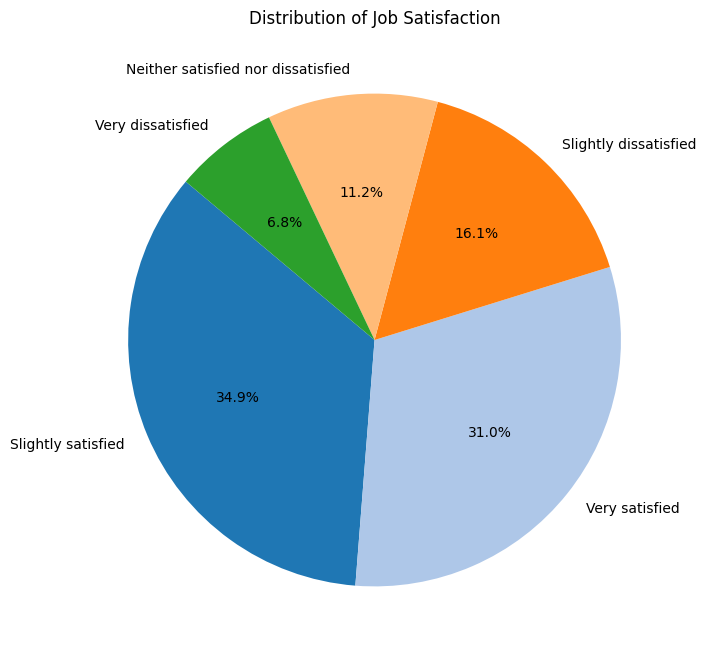

In [15]:
import matplotlib.pyplot as plt

job_counts = df['JobSat'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    job_counts,
    labels=job_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors  # Daha kontrastlı renkler
)
plt.title('Distribution of Job Satisfaction')
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


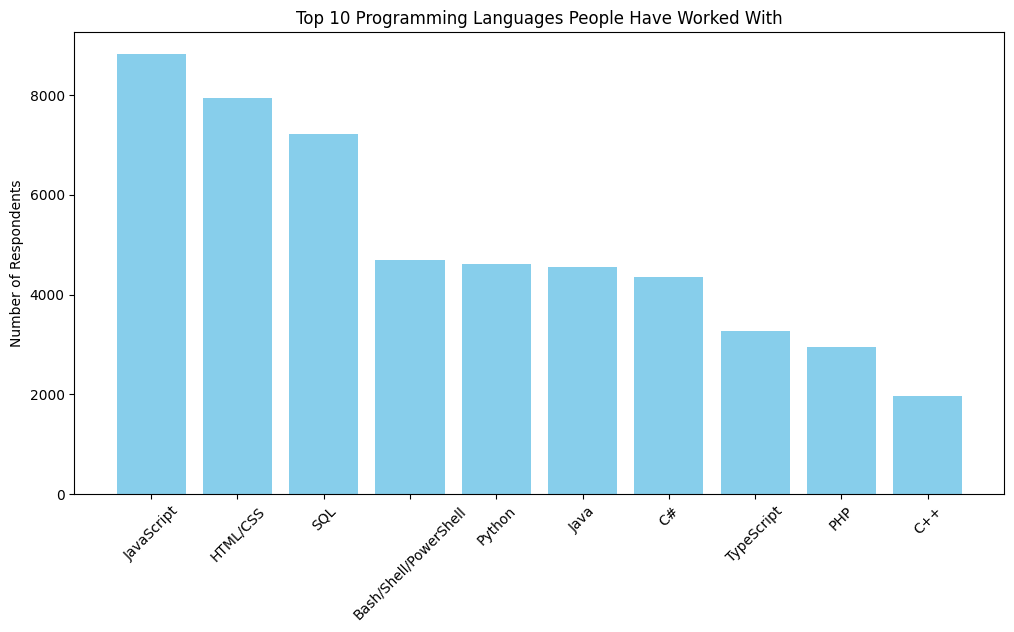

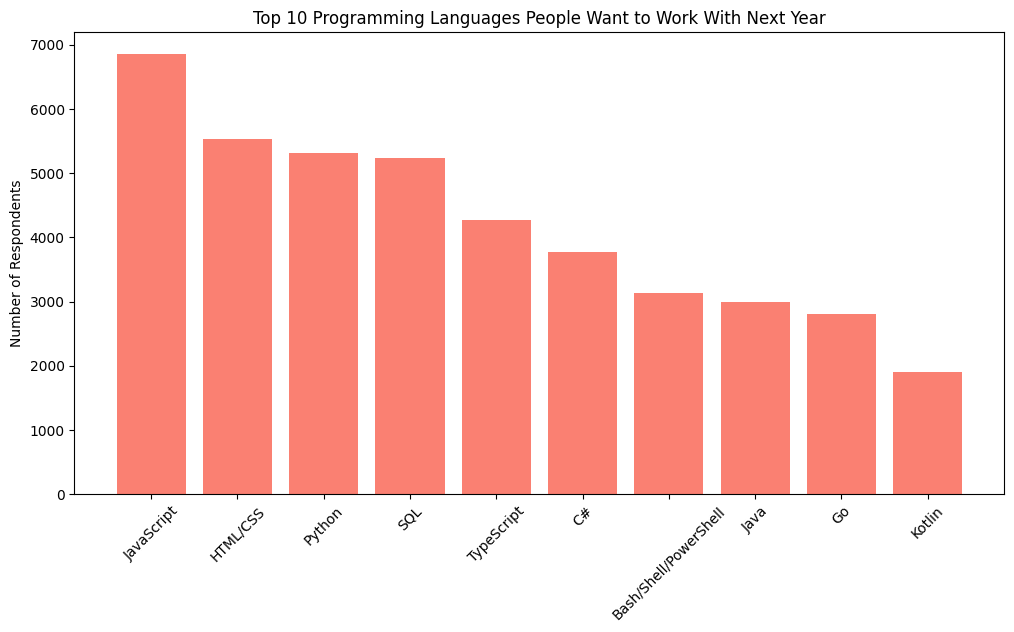

In [17]:
import matplotlib.pyplot as plt
from collections import Counter

df_lang = df['LanguageWorkedWith'].dropna()
worked_counts = Counter()

for langs in df_lang:
    worked_counts.update(langs.split(';'))

# En popüler 10 dil
top_langs = [lang for lang, _ in worked_counts.most_common(10)]
worked_vals = [worked_counts[lang] for lang in top_langs]

plt.figure(figsize=(12,6))
plt.bar(top_langs, worked_vals, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Number of Respondents')
plt.title('Top 10 Programming Languages People Have Worked With')
plt.show()

df_lang_want = df['LanguageDesireNextYear'].dropna()
want_counts = Counter()

for langs in df_lang_want:
    want_counts.update(langs.split(';'))

# En popüler 10 dil
top_langs_want = [lang for lang, _ in want_counts.most_common(10)]
want_vals = [want_counts[lang] for lang in top_langs_want]

plt.figure(figsize=(12,6))
plt.bar(top_langs_want, want_vals, color='salmon')
plt.xticks(rotation=45)
plt.ylabel('Number of Respondents')
plt.title('Top 10 Programming Languages People Want to Work With Next Year')
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


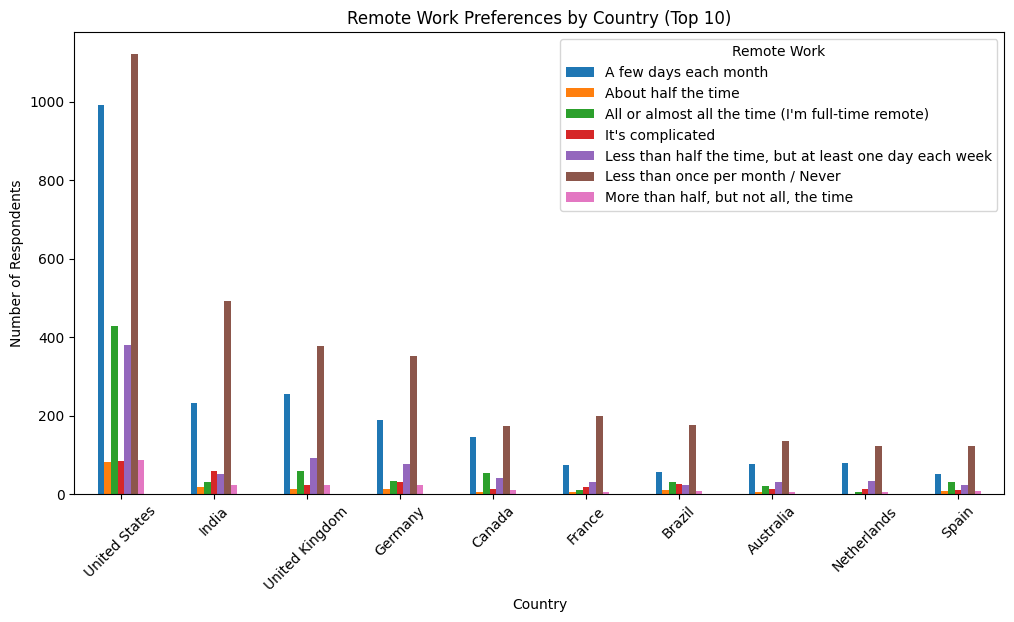

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eksik değerleri çıkar
df_remote = df[['Country', 'WorkRemote']].dropna()

# Country başına WorkRemote dağılımı
remote_counts = df_remote.groupby(['Country', 'WorkRemote']).size().unstack(fill_value=0)

# En çok örneklenen 10 ülke
top_countries = remote_counts.sum(axis=1).sort_values(ascending=False).head(10).index
remote_counts_top = remote_counts.loc[top_countries]

# Bar plot
remote_counts_top.plot(kind='bar', figsize=(12,6), stacked=False)
plt.ylabel('Number of Respondents')
plt.title('Remote Work Preferences by Country (Top 10)')
plt.xticks(rotation=45)
plt.legend(title='Remote Work')
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Pearson correlation: 0.007, p-value: 0.438
Spearman correlation: 0.005, p-value: 0.614


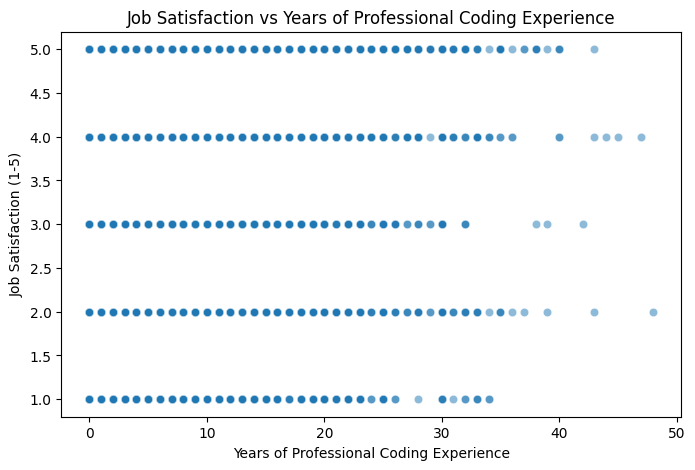

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

# Önce YearsCodePro'yu sayısal değere çevir
def convert_years(x):
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return None

df['YearsCodeProNum'] = df['YearsCodePro'].apply(convert_years)

# JobSat'ı sayısala çevir
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSatNum'] = df['JobSat'].map(job_sat_mapping)

# Eksik değerleri çıkar
df_corr = df[['YearsCodeProNum', 'JobSatNum']].dropna()

# Pearson ve Spearman korelasyon
pearson_corr, pearson_p = pearsonr(df_corr['YearsCodeProNum'], df_corr['JobSatNum'])
spearman_corr, spearman_p = spearmanr(df_corr['YearsCodeProNum'], df_corr['JobSatNum'])

print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_corr, x='YearsCodeProNum', y='JobSatNum', alpha=0.5)
plt.title('Job Satisfaction vs Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (1-5)')
plt.show()


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


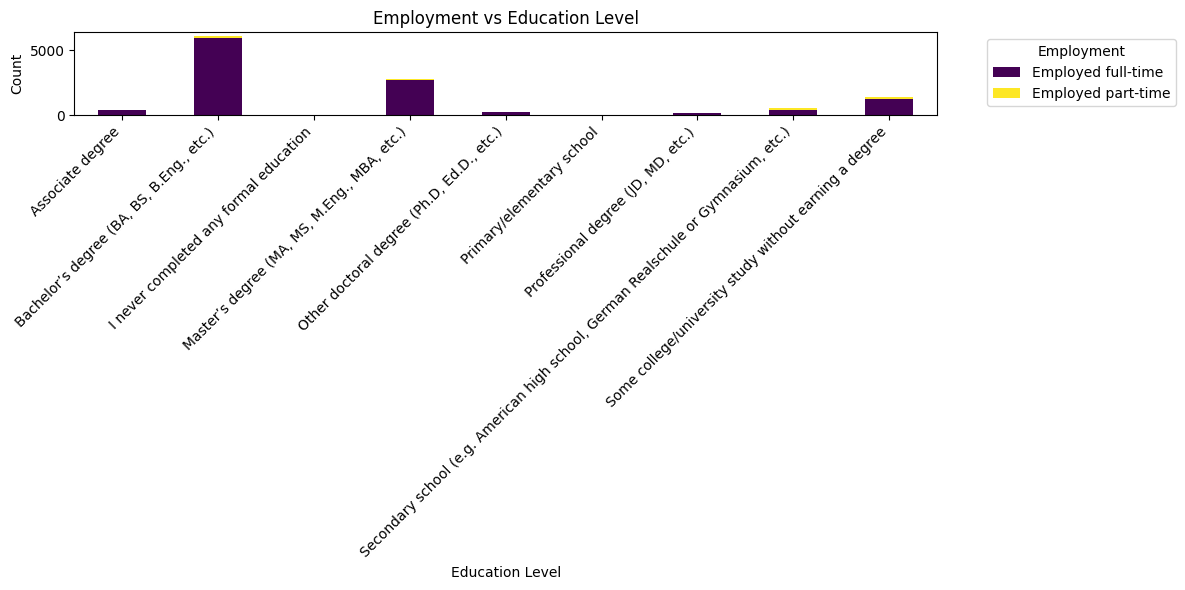

In [23]:
# Eksik değerleri doldur
df['EdLevel'] = df['EdLevel'].fillna('Unknown')
df['Employment'] = df['Employment'].fillna('Unknown')

# Crosstab oluştur
crosstab = pd.crosstab(df['EdLevel'], df['Employment'])

# Stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Employment vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [24]:
df.to_csv("cleaned_survey_data_lab2.csv", index=False)
print("✅ Cleaned dataset for Lab 2 saved as 'cleaned_survey_data_lab2.csv'")

✅ Cleaned dataset for Lab 2 saved as 'cleaned_survey_data_lab2.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
